# 第18讲 线性代数方程组求解与线性回归分析

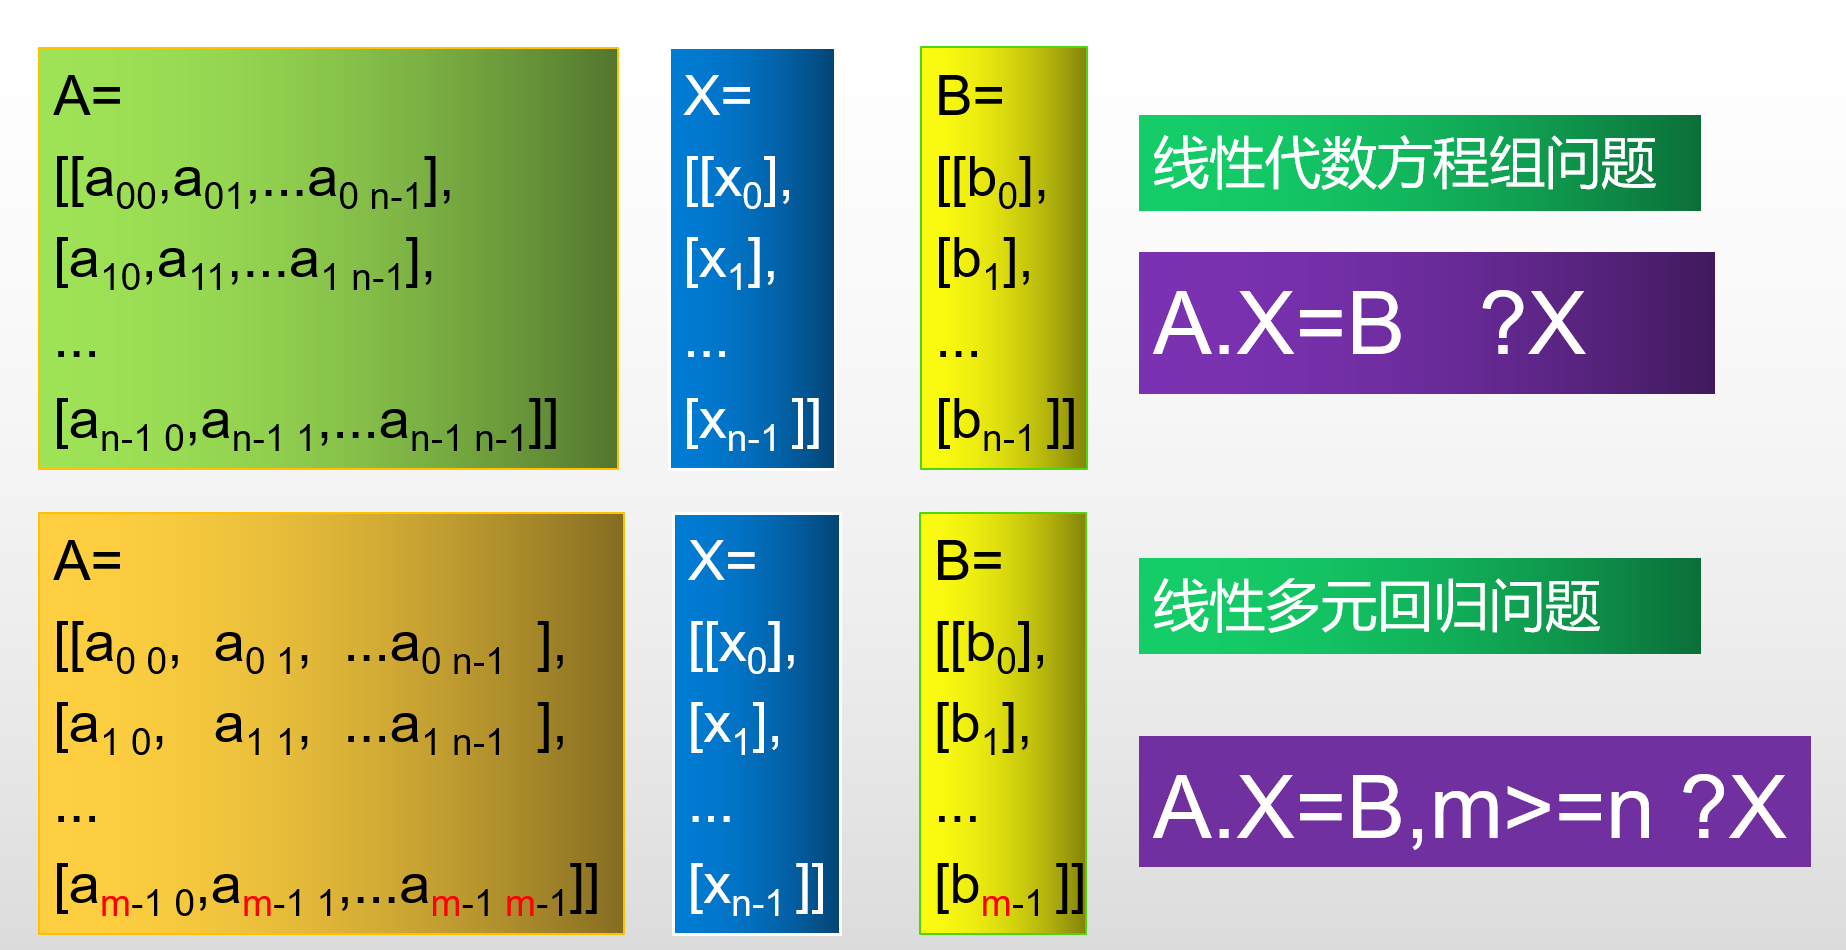

## 逆矩阵np.linalg.inv

满秩或行列式不为0的方阵，其逆矩阵是存在的，例如

In [4]:
import numpy as np;
ar=np.array;
invm=np.linalg.inv
a=ar([[15,-2,6],[10,45,-23],[1,0,3]])
det_a=np.linalg.linalg.det(a);
a_rank=np.linalg.linalg.matrix_rank(a)
print(det_a,a_rank)

1861.0 3


矩阵a满秩，行列式不为0，逆矩阵存在


In [6]:
ai=invm(a)
;print('a=',a);
print('inv(a)=',ai)
I=ai.dot(a).round(0)# 逆矩阵与原矩阵点积为单位矩阵。
print(I)


a= [[ 15  -2   6]
 [ 10  45 -23]
 [  1   0   3]]
inv(a)= [[ 0.07254164  0.00322407 -0.12036539]
 [-0.02847931  0.02095648  0.21762493]
 [-0.02418055 -0.00107469  0.37345513]]
[[ 1. -0. -0.]
 [ 0.  1. -0.]
 [ 0.  0.  1.]]


## 线性代数方程组逆矩阵解法与np.linalg.solve解法

以三元一次方程组 2x+3y+4z=5,x-y+5z=8,3x+2y-z=3为例展示两种解法。

In [8]:
import numpy as np;

a=np.array([[2,3,4],[1,-1,5],[3,2,-1]]);
b=np.array([5,8,3])
x1=np.linalg.solve(a,b);
print('x1=',x1);
print(np.allclose(a.dot(x1),b))

ai=np.linalg.inv(a);
x2=ai.dot(b);
print('x2=',x2);
print(np.allclose(a.dot(x2),b))

x1= [ 2. -1.  1.]
True
x2= [ 2. -1.  1.]
True


## 多元线性回归分析

设因变量y线性依赖n个变量[x1,...xn],即

        y=c0+c1 x1+...+ cn xn

其中[c0,c1,...cn]通过对y和[x1,x2,...xn]的m(>=n)组试验观测数据来决定[c0,c1,...cn]。决定系数[c0,c1,...cn]的过程称为n元线性回归。
     
     设y和[x1,x2,...xn]的m(>=n)组试验观测数据可以用列向量和矩阵
         
         Y=[[y0,y1,...ym]].T, 
         
         X=[[1,x10,x20,...xn0],[1,x11,x21,...xn1],...[1,x1m,x2m,...xnm]]
表示。于是有
        
        X.C=Y

给方程两边同乘M=X.T.conjugate(), 方程简化为
        
        A.C=B
        
其中 A=M.X,  B=M.Y,   X和M不是方阵，其行数看多于列数。但 A=M.X 是方阵。如果A满秩，则回归系数为
    
    C=np.linalg.linalg.inv(A).B  或 C=np.linalg.solve(A,B)

到此，因变量 y 依赖于 [x1,x2,...xn] 的多元线性函数关系得以建立。

## 多元线性回归分析举例

我们构建一组数据模拟实验观测结果，以此演示多元回归分析。设我们要探索 u=c0+c1*x+c2*y+c3*z决定[c0,c1,c2,c3],所需的程序如下：


In [16]:
import numpy as np

ud=(0,5,-3,3,-2,8 )#自变量采样区间
c=(5,2,4,-3)
er=0.01

m=10
v=np.zeros((m,3))

for i in range(3): 
    r1=er*np.random.random(m)
    v[:,i]=np.linspace(ud[2*i],ud[2*i+1],m)+r1
    
Y=er*np.random.random((m,1))+c[0]

for i in range(3):
    Y[:,0]+=v[:,i]*c[i+1]
    
X=np.zeros((m,4));
X[:,0]=1;
X[:,1:]=v
# 构建采样数据 Y 和 X。

In [15]:
# 线性回归解 Y=X.C。特别 X的行数大于列数。
M=X.T.conjugate();
A=M.dot(X);
B=M.dot(Y);
AI=np.linalg.linalg.inv(A)
C1=AI.dot(B);
# 或者  C2=np.linalg.solve(A,B)
print('c=',np.ravel(C1));
error=np.max(X.dot(C1)-Y).round(4)
print('error=',error)
# 实际工作中Y 和 X可能来源于实验。

c= [ 8.49781391  0.51927809  5.1152949  -2.92923857]
error= 0.002
